# Logistic_Regression

This time we are going to look at logistic regression. The data were obtained by the 
[Space Shuttle Challenger disaster](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)
O-ring data failure data (from 1986):

Failures at temperatures: [70, 57, 63, 70, 53, 75, 58]

Successes at temperatures: [66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76]

Apparently they were aware of failures and successes at various temperatures, but were not considering the temperature dependence of these numbers when making the decision to launch at $31^\circ$ F.

### Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Creating lists to work with the data

In [2]:
failure=[70, 57, 63, 70, 53, 75, 58]
success=[66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76]
xdata,ydata=zip(*[[t,0] for t in failure] + [[t,1] for t in success])

### Plotting the data

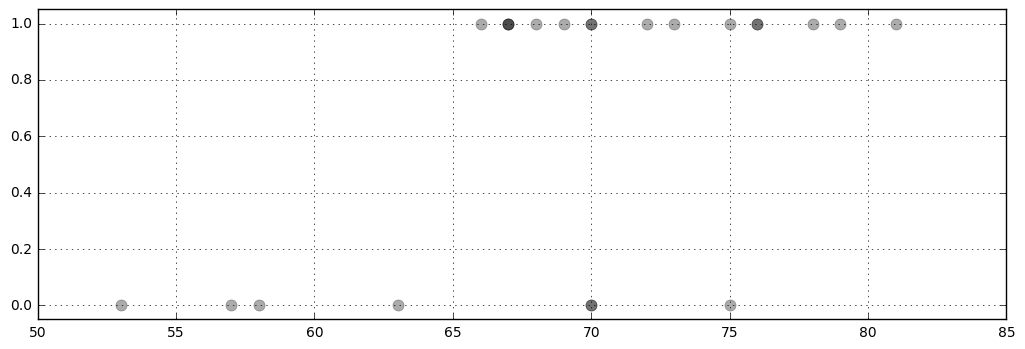

In [3]:
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0,1.01,.2))
plt.plot(xdata,ydata,'ko',alpha=.33,markersize=8)
plt.ylim(-.05,1.05)
plt.grid('on')

Looking at the above graph of this data, suggests modeling the data with a logistic function:
Assuming the probability of success at temperature $t$ is given by $p(t) = 1/(1+\exp(-a(t-t_0))$, let's find the maximum likelihood fit for the values of $a$ and $t_0$.

For these values, what is the probability of failure at the actual launch temperature $t=31^\circ$ F.?

Note that the transparency alpha=.33 makes visible when points are on top of each other (e.g., there are three success data points for t=67, and two failures and two successes for t=70).

### Define and plot the logistic function

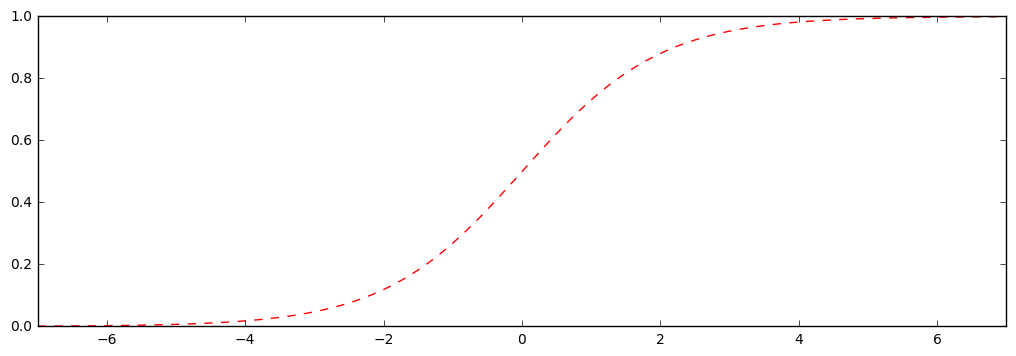

In [4]:
def p(t,a=1.,t0=0.): return 1./(1.+np.exp(-a*(t-t0)))

plt.figure(figsize=(12.5, 4))
plt.xlim(-7,7)
xr=np.arange(-7.,7.1,.1)
plt.plot(xr,p(xr),'r--');

### Objective

The object is to find parameters `a` and `t0` for the logistic `p(t,a,t0)` that give the highest overall probability of the data.

For each value of `t0` and `a`, there's a sigmoid function `p(t,a,t0)`. Mathematically that's $p(t\ |\ t_0, a)$, 
the probability that the O-ring is OK at temperature `t`, given some value of `t0` and `a`.
The probability of a data point is therefore `p(t,a,t0)` if the datapoint is a success (1), and `1- p(t, t0, a)` if the datapoint is a failure (0).

To calculate the overall probability of the data (for some fixed `t0,a`), we take a product of the above probabilities over the 23 data points (7 failures, 16 successes), i.e., 
`(1-p(53 , t0,a)) * (1- p(57 , t0, a)) * ... * p(79 , t0, a) * p(78 , t0, a)`
(and if a datapoint occurs more than once, it is included multiple times in the product, according to how it occurred each time).

The optimal values of `t0` and `a` maximize the probability of the data (given the assumption that the probability of failure is given by a sigmoid function in the first place).

Then for those maximum probable values, we will calculate the probability of failure for `t=31`.

#### Notes

It's usually preferable to calculate the log of something small like a product of probabilities to avoid underflow. The log of the above expression is just the sum of the logs of the terms in the product, so the result would be
`np.sum(np.log(1-p(T0,t0,a))) + np.sum (np.log(p(T1,t0,a))`
where `T0` is an array of values of t with failed o-ring (0), and T1 is an array of values of t with success (1).<br>
Note that `p()` of an array will give a list of probabilities for each value in the array, then `np.log()` will similarly map onto each term on the list, then those values are summed by `np.sum()`.

There are more efficient ways of finding optimal values of parameters, but since there are only two parameters in this case it is possible to perform a brute-force search over the 2-dimensional grid of  values of `a in np.arange(.01,1.,.01)` and `t0 in np.arange(50,85.001,.5)`. That would be 100 values of `a` from .01 to 1, and 72 values of `t0` from 50 to 85.

### Finding the max

In [5]:
p_max= {}
for a in np.arange(.01,1.,.01):
    for t0 in np.arange(50,85.001,.5):
        p_max[a,t0] = np.sum(np.log(1-p(failure,a,t0))) + np.sum(np.log(p(success,a,t0)))
max(p_max.values())

-10.161118065421583

### Find optimal values of  `a` and `t0` 

In [6]:
for k,v in p_max.items():
    if v == max(p_max.values()):
        print('max at a={0}, t0={1}'.format(k[0],k[1]))

max at a=0.24000000000000002, t0=65.0


### Plot the resulting logistic function on the original graph

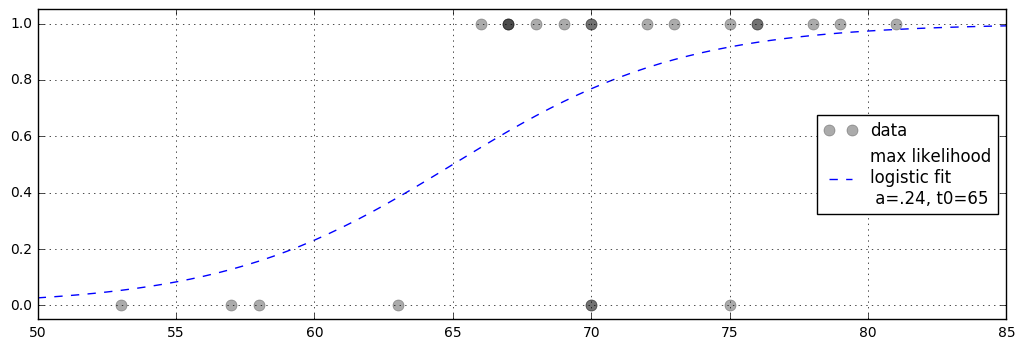

In [7]:
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0,1.01,.2))
plt.ylim(-.05,1.05)
xr=np.arange(50,85.001,.5)

plt.plot(xdata,ydata,'ko',alpha=.33,markersize=8)
plt.plot(xr,p(xr,0.24,65),'b--')
plt.legend(['data','max likelihood\nlogistic fit\n a=.24, t0=65'],loc='center right');

plt.grid('on')

### Should we launch?

In [8]:
print('probability of failure at t=31 = {:.2%}'.format(1-p(31,.24,65)))

probability of failure at t=31 = 99.97%
